In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from netCDF4 import Dataset
import datetime
from regrid import regrid
import glob
import warnings
warnings.filterwarnings("ignore")

### load OIB SITs and calculate mean

In [37]:
datapath = '/Users/carmennab/Dropbox/met_office/data/validation/OIB/matched/rosie_UCL_BASELINE_SIT_ASSIM_CS2_AWI_SNFOAM_ALPHA1_r243541_dcarneir/'

days = np.arange(0,212)
dates = [datetime.date(2016,10,1)+datetime.timedelta(days=int(days)) for days in days]

lons = [] ; lats = [] ; obs = []
for day in days:
    date = dates[day].strftime('%Y%m%d')
    filepath = datapath + date + 'T0000Z_sitfb_oo_fdbk.nc'
    if os.path.exists(filepath) == True:
        file = Dataset(filepath)
        ob = np.array(file['SIT_OBS'][:,0])
        lon = np.array(file['LONGITUDE'])
        lat = np.array(file['LATITUDE'])

        obs.extend(ob) ; lons.extend(lon) ; lats.extend(lat)
        
oib_sit = np.array(obs) ; oib_lon = np.array(lons) ; oib_lat = np.array(lats)

### load BGEP coordinates

In [38]:
# load ULS_A coordinates
datapath = '/Users/carmennab/Dropbox/met_office/data/validation/'
ulsa_sit = np.array(Dataset(datapath + 'BGEP/a_SIT_FOAM_01Oct2016-30Apr2017.nc')['Sea Ice Thickness'])
ulsa_lon = np.array(Dataset(datapath + 'BGEP/a_SIT_FOAM_01Oct2016-30Apr2017.nc')['Longitude'])
ulsa_lat = np.array(Dataset(datapath + 'BGEP/a_SIT_FOAM_01Oct2016-30Apr2017.nc')['Latitude'])

ulsa_lonss = []
ulsa_latss = []
for sits in ulsa_sit:
    ulsa_lonss.append(ulsa_lon[~np.isnan(sits)])
    ulsa_latss.append(ulsa_lat[~np.isnan(sits)])

ulsa_lons = np.concatenate(ulsa_lonss,axis=0)
ulsa_lats = np.concatenate(ulsa_latss,axis=0)

In [39]:
# load ULS_B coordinates
datapath = '/Users/carmennab/Dropbox/met_office/data/validation/'
ulsb_sit = np.array(Dataset(datapath + 'BGEP/b_SIT_FOAM_01Oct2016-30Apr2017.nc')['Sea Ice Thickness'])
ulsb_lon = np.array(Dataset(datapath + 'BGEP/b_SIT_FOAM_01Oct2016-30Apr2017.nc')['Longitude'])
ulsb_lat = np.array(Dataset(datapath + 'BGEP/b_SIT_FOAM_01Oct2016-30Apr2017.nc')['Latitude'])

ulsb_lonss = []
ulsb_latss = []
for sits in ulsb_sit:
    ulsb_lonss.append(ulsb_lon[~np.isnan(sits)])
    ulsb_latss.append(ulsb_lat[~np.isnan(sits)])

ulsb_lons = np.concatenate(ulsb_lonss,axis=0)
ulsb_lats = np.concatenate(ulsb_latss,axis=0)

In [40]:
# load ULS_D coordinates
datapath = '/Users/carmennab/Dropbox/met_office/data/validation/'
ulsd_sit = np.array(Dataset(datapath + 'BGEP/d_SIT_FOAM_01Oct2016-30Apr2017.nc')['Sea Ice Thickness'])
ulsd_lon = np.array(Dataset(datapath + 'BGEP/d_SIT_FOAM_01Oct2016-30Apr2017.nc')['Longitude'])
ulsd_lat = np.array(Dataset(datapath + 'BGEP/d_SIT_FOAM_01Oct2016-30Apr2017.nc')['Latitude'])

ulsd_lonss = []
ulsd_latss = []
for sits in ulsd_sit:
    ulsd_lonss.append(ulsd_lon[~np.isnan(sits)])
    ulsd_latss.append(ulsd_lat[~np.isnan(sits)])

ulsd_lons = np.concatenate(ulsd_lonss,axis=0)
ulsd_lats = np.concatenate(ulsd_latss,axis=0)

In [41]:
np.float = float

### plot figure

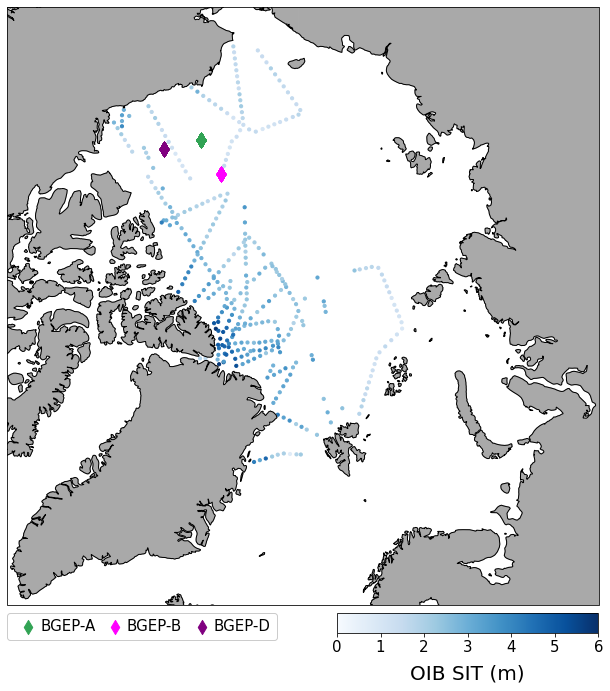

In [42]:
foam_lats = np.load('/Users/carmennab/Dropbox/met_office/data/auxiliary/lat_cent.npy')
foam_lons = np.load('/Users/carmennab/Dropbox/met_office/data/auxiliary/lon_cent.npy')

fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(projection=ccrs.NorthPolarStereo())

# plot OIB SIT and create colorbar
p_map = ax.scatter(oib_lon,oib_lat,c= oib_sit,cmap='Blues',vmin=0,vmax=6,
                      transform=ccrs.PlateCarree(),s=10)
cbar_ax = fig.add_axes([0.555, 0.09, 0.33, 0.025]) # x, y, width, height
a = fig.colorbar(p_map, cax=cbar_ax,orientation="horizontal")
a.ax.tick_params(labelsize=15)
a.set_ticks([0,1,2,3,4,5,6])
a.set_label("OIB SIT (m)", fontsize = 20, labelpad = 10)

# plot BGEP locations
ax.scatter(ulsa_lon,ulsa_lat,c='#31a354',transform=ccrs.PlateCarree(),label='BGEP-A',s=100,marker="d")
ax.scatter(ulsb_lon,ulsb_lat,c='fuchsia',transform=ccrs.PlateCarree(),label='BGEP-B',s=100,marker="d")
ax.scatter(ulsd_lon,ulsd_lat,c='purple',transform=ccrs.PlateCarree(),label='BGEP-D',s=100,marker="d")

ax.add_feature(cartopy.feature.LAND, color='darkgrey',zorder=1)
ax.add_feature(cartopy.feature.OCEAN, color='white', edgecolor='black')
ax.set_extent([-180, 180, 90, 67], ccrs.PlateCarree())
ax.coastlines()
ax.legend(bbox_to_anchor=(0.4675, -0.00),fontsize=15,columnspacing=0.3,handletextpad=-0.2, ncol=3,framealpha=1)

plt.savefig('/Users/carmennab/Dropbox/Apps/Overleaf/FOAM sensitivity/main_figs/obs_locations.png',
            bbox_inches = "tight", dpi = 400)